<a href="https://colab.research.google.com/github/liviaalmada/mineracao-dados-20202/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DBSCAN

**Density-Based Spatial Clustering of Applications with Noise**



*  Algoritmo de clusterização
*  Baseado em densidade
*  Capaz de identificar ruídos
*  Ideia geral: formar clusters de pontos que estão em uma mesma região densa

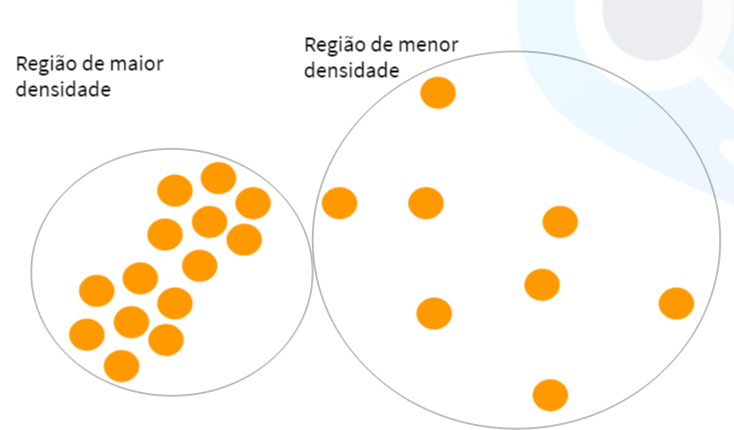


### Hyper Parâmetos

**eps** - define uma distância máxima 

**minPts** - define um mínimo de pontos

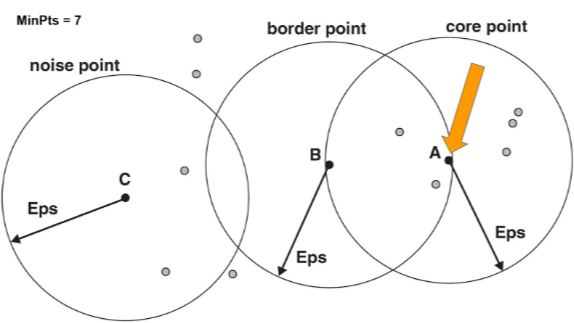

In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Criando um conjunto de dados sintético

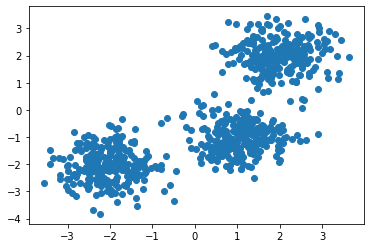

In [2]:
centers = [[2, 2], [-2, -2], [1, -1]]
x, labels_true = make_blobs(n_samples=750, centers=centers, 
                            cluster_std=0.6,
                            random_state=0)
plt.scatter(x[:,0], x[:,1])
plt.show()

In [3]:
eps = 1
minPts = 10

Escolhendo um ponto do dataset


In [4]:
i = np.random.random_integers(750)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 750 + 1) instead
  """Entry point for launching an IPython kernel.


Imprimindo o ponto sorteado


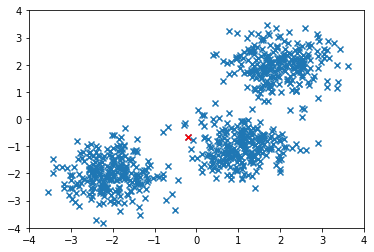

In [5]:
plt.scatter(x[:,0], x[:,1],marker='x')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter([x[i,0]], [x[i,1]],marker='x', color = "r")

Verificando a quantidade de pontos na vizinhança do ponto sorteado

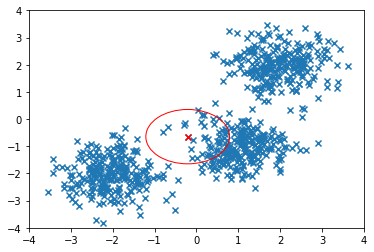

In [6]:
plt.scatter(x[:,0], x[:,1],marker='x')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter([x[i,0]], [x[i,1]],marker='x', color = "r")
circle=plt.Circle((x[i,0], x[i,1]),eps,fill=False, color='r')
plt.gcf().gca().add_artist(circle)
plt.show()

In [7]:
def plot_db_clusters(db, X):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (db.labels_ == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Nombre de Clusters: %d' % n_clusters)


### DBSCAN Exemplo

In [8]:
eps = 0.5


In [9]:
dbscan = DBSCAN(eps=eps, min_samples = 50)

In [10]:
db = dbscan.fit(x)

In [11]:
labels = set(db.labels_)

In [12]:
labels

{-1, 0, 1, 2}

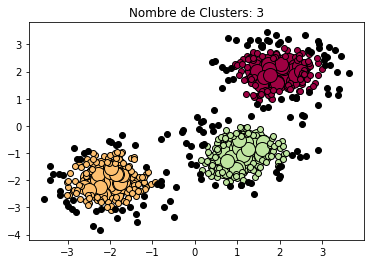

In [13]:

plot_db_clusters(db,x)